###  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서 
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

### Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [2]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()

In [3]:

# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


## Random Forest

https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

### 랜덤 포레스트(Random Forest)
- 앙상블 기법 중 하나로, 의사결정나무(Decision Tree)를 기반으로 한 분류 및 회귀 알고리즘입니다. 랜덤 포레스트는 여러 개의 의사결정나무를 조합하여 강력한 예측 모델을 구축하고, 과적합을 방지하며 일반화 성능을 향상시킵니다.

- 랜덤 포레스트의 동작 원리

    - 데이터 샘플링: 원본 데이터에서 무작위로 중복을 허용하여 샘플을 선택합니다. 이렇게 선택된 샘플들을 사용하여 각각의 의사결정나무를 학습시킵니다. 이러한 방식을 부트스트래핑(bootstrapping)이라고 합니다.

    - 특징 선택: 각 의사결정나무의 학습 과정에서 특징 선택 시 무작위로 일부 특징만을 고려합니다. 이는 의사결정나무 간의 다양성을 증가시켜 모델의 예측력을 향상시키는 역할을 합니다.

    - 의사결정나무 학습: 선택된 샘플과 특징을 사용하여 의사결정나무를 학습시킵니다. 각 의사결정나무는 주어진 데이터에 대해 분할 기준과 분기를 결정하여 예측 규칙을 생성합니다.

    - 예측 결합: 학습된 모든 의사결정나무를 사용하여 새로운 데이터의 예측값을 도출합니다. 분류 문제에서는 다수결 투표를 통해 가장 많은 표를 받은 클래스가 최종 예측값이 됩니다. 회귀 문제에서는 평균값을 사용합니다.

- 랜덤 포레스트 장점

    - 과적합 방지: 랜덤 포레스트는 의사결정나무의 과적합 문제를 완화시킵니다. 샘플링과 특징 선택의 무작위성을 통해 다양한 의사결정나무를 조합하고, 이들의 예측을 평균화함으로써 일반화 성능을 향상시킵니다.

    - 변수 중요도 제공: 랜덤 포레스트는 변수의 중요도를 계산할 수 있습니다. 각 의사결정나무에서 변수의 사용 빈도나 분산 기준에 따라 중요도를 측정하고, 이를 모든 의사결정나무에서 평균화하여 변수의 상대적 중요도를 얻을 수 있습니다. 이를 통해 데이터에서 어떤 변수가 예측에 가장 큰 영향을 미치는지를 알 수 있습니다.

    - 안정성과 신뢰성: 랜덤 포레스트는 여러 개의 의사결정나무를 결합한 모델이므로, 개별 의사결정나무의 오류나 노이즈에 덜 민감합니다. 이를 통해 안정적이고 신뢰성 있는 예측을 제공할 수 있습니다.

    - 다양한 데이터 타입 처리: 랜덤 포레스트는 범주형 데이터와 연속형 데이터 모두를 처리할 수 있습니다. 범주형 변수의 경우 원-핫 인코딩 등의 전처리 과정이 필요하지 않습니다.

    - 비교적 빠른 학습과 예측 속도: 의사결정나무의 학습과 예측이 병렬로 수행되므로, 데이터가 크거나 차원이 높아도 상대적으로 빠른 학습 및 예측 속도를 보장할 수 있습니다.

- 랜덤 포레스트는 의사결정나무의 단점인 해석력이 다소 떨어진다는 점을 가지고 있습니다. 여러 개의 의사결정나무를 조합하므로 최종 모델의 해석이 어려울 수 있습니다. 또한, 랜덤 포레스트는 모델 구성을 위해 많은 수의 의사결정나무를 사용해야 하므로, 모델의 복잡성과 메모리 사용량이 증가할 수 있습니다.

- 랜덤 포레스트는 다양한 분류 및 회귀 문제에 적용할 수 있는 강력한 알고리즘으로 알려져 있으며, 데이터셋의 특성과 목표에 맞게 사용될 수 있습니다.

과제1_0518. 타이타닉 데이터 셋에 대하여 필요한 전처리를 수행한 후 랜덤포레스트 알고리즘을 적용하여 평가 및
성능 개선을 수행하세요.

In [1]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test,pred)
accuracy_rf
# len(X_test)

0.8491620111731844

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 200, 300],
    'max_depth' : [2, 4, 6, 8], 
    'min_samples_leaf' : [2, 6, 8, 10, 12, 18 ],
    'min_samples_split' : [2, 4, 8, 12, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.8259


In [5]:
rf_clf1 = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=2, \
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8659


과제2_0513. 과제1로 부터 변수 중요도를 도출하고 시각화하세요.

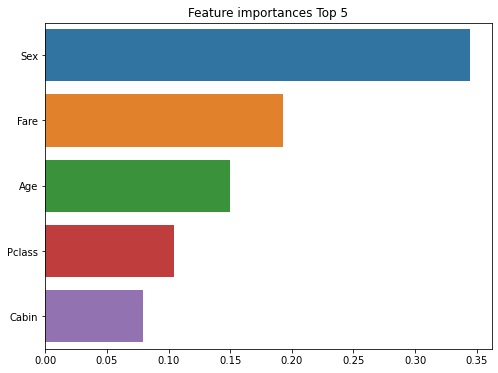

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5 , y = ftr_top5.index)
plt.show()

## GBM(Gradient Boosting Machine)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용한다.
- 분류는 물론이고 회귀도 가능
- 파라미터 : n_estimators, max_depth, max_features
 - loss : 경사하강법에서 사용할 비용함수 지정. 기본값 deviance 적용
 - learning_rate : GBM이 학습할 때마다 적용할 학습률.오류값 보정 시 적용하는 계수로 0 ~ 1 사이의 값 지정. 기본값은 0.1. 작게 설정하면 예측성능이 높아지나 수행시간이 오래 걸리고 큰 값을 적용하면 예측 성능이 떨어질 가능성이 높으나 빠른 수행이 가능. n_estimator와 상호 보완적으로 조합해 사용
 - n_estimator : weak learner의 개수
 - subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 200, 300],
    'learning_rate' : [ 0.05, 0.1, 0.15, 0.2]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=5 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))